In [16]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('D:\Data Science\Datasets\creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.Class.unique()

array([0, 1], dtype=int64)

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#create dependent and independent Features

columns = data.columns.tolist()

columns = [c for c in columns if c not in['Class']]
target = 'Class'

state = np.random.RandomState(42)

X = data[columns]
y = data[target]

X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [9]:
data.isnull().values.any()

False

In [11]:
count_class = pd.value_counts(data['Class'], sort = True)

Text(0, 0.5, 'Frequency')

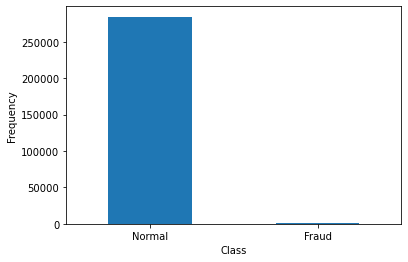

In [17]:
LABELS = ["Normal", "Fraud"]
count_class.plot(kind = 'bar', rot = 0)
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [18]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [20]:
#Implmenting under sampling

from imblearn.under_sampling import NearMiss

In [24]:
nm = NearMiss()
X_res, y_res = nm.fit_sample(X, y)

print(X_res.shape, y_res.shape)

(984, 30) (984,)


In [27]:
from collections import Counter

In [29]:
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [34]:
Counter(y)

Counter({0: 284315, 1: 492})

In [35]:
#Oversampling

In [36]:
from imblearn.combine import SMOTETomek

In [49]:
smk = SMOTETomek(random_state=42)

In [38]:
X_res, y_res = smk.fit_resample(X, y)

print(X_res.shape, y_res.shape)

(567562, 30) (567562,)


In [39]:
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


In [40]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(sampling_strategy= {0 : 284315, 1 : 284315})

X_train_res, y_train_res = ros.fit_resample(X, y)
print(X_train_res.shape, y_train_res.shape)

(568630, 30) (568630,)


In [47]:
Counter(y_train_res)

Counter({0: 284315, 1: 284315})